# Perceptron

## Analogy from biological neuron and Perceptron

The Perceptron model is based on a biological neuron, so it's possible capture some analogies between this two elements.
In a biological neuron, there are four principal elements:


1.   Dendrite
2.   Nucleus
3.   Axon
4.   Terminal

Dendrites are like the Perceptron's weight, the net input *z* is analogus to the nucleus, the axon is comparable to the activation function, and the output is corrispond to the axon terminal.



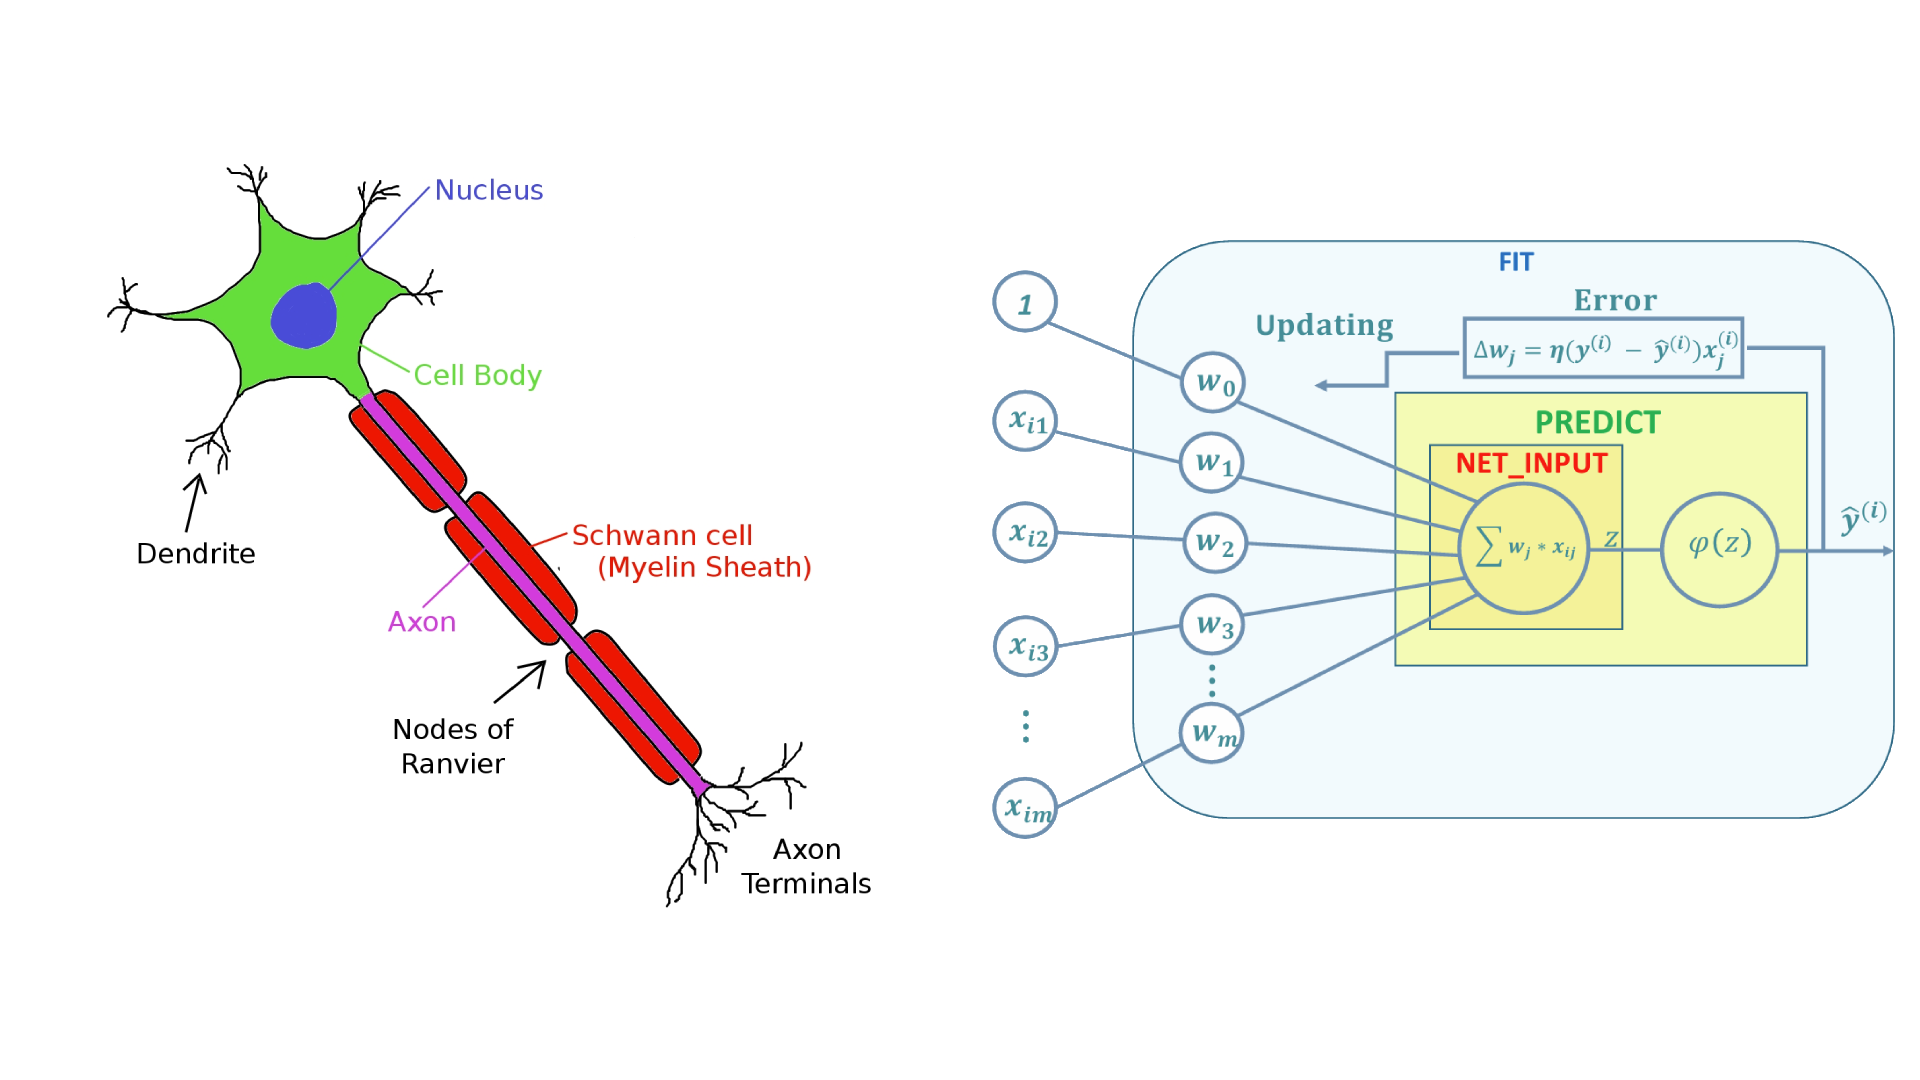

## Development of Perceptron model in Python

I'll try to develop the Perceptron model using object-oriented approch.
I'll define a new Perceptron class with four methos:


1.   **Fit: **: Used to understand and learn the data
2.   **Predict: ** Used to classify new data
3.   **net_input: ** Used to calculate the sum of input and weight
4.   **predict: ** Used to predict the class using Unit step function



### Package

In [3]:
!pip install ucimlrepo

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
class Perceptron(object):
  """
    Perceptron classifier.

    Parameters
    ----------
    lr : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Epochs
    random_state : int
        Random number seed
  """

  def __init__(self, lr = 0.01, n_iter = 50, random_state = 1):
    self.lr = lr
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):

    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1+ X.shape[1])
    self.errors = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.lr*(target-self.predict(xi))
        self.w[1:] += update*xi
        self.w[0] += update
        errors += int(update != 0.0)
      self.errors.append(errors)
    return self

  def net_input(self,xi):
    return np.dot(xi, self.w[1:]) + self.w[0]

  def predict(self, xi):
    return np.where(self.net_input(xi) >= 0.0, 1, -1)


### Import iris data into the code

In [46]:
from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets
df = pd.DataFrame(data=X[0:100], columns=iris.feature_names)
df['target'] = y[0:100]

y = df.iloc[0:100,4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0,2]].values


In [47]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Train perceptron with iris dataset

For this case I'll use only two class of target attribute, Setosa and Versicolor

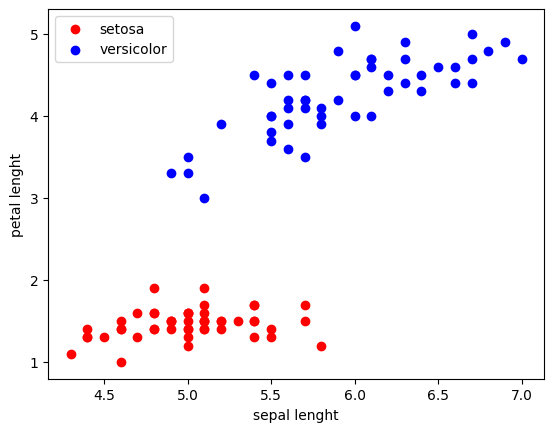

In [49]:
plt.scatter(X[0:50,0], X[0:50,1], color = "red", label = "setosa")
plt.scatter(X[50:100,0], X[50:100,1], color = "blue", label = "versicolor")

plt.xlabel("sepal lenght")
plt.ylabel("petal lenght")
plt.legend(loc = "upper left")
plt.show()


The scatter plot shows the distribution of iris flowers, and it's notable that it's possible to separate the class linearly

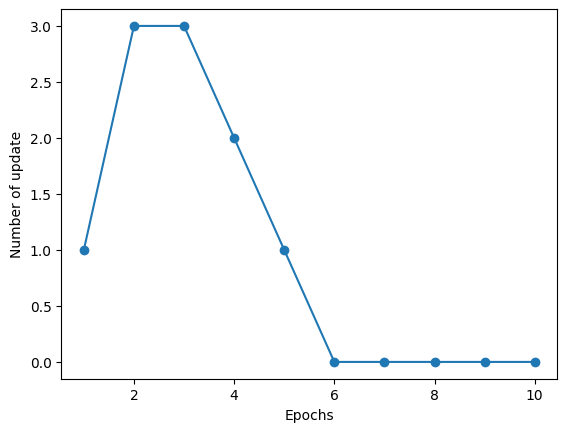

In [51]:
ppn = Perceptron(lr = 0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors)+1), ppn.errors, marker = "o")
plt.xlabel("Epochs")
plt.ylabel("Number of update")
plt.show()

After six epochs of training, the Perceptron algorithm find the optimal solution